In [482]:
#imports
import gensim.downloader as gm 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [483]:
# Load the synonyms 
synonyms = pd.read_csv('synonyms.csv', sep=",",header=0)

# Load the word2vec-google-news-300 model
word2vec = gm.load('word2vec-google-news-300')


<h1>Task 1</h1>

In [484]:
def get_results(model):
    results = {"question": [], "answer": [], "prediction": [], "label": []}

    for row in synonyms.iterrows():
        predictions = []
        label = ""
        question = row[1]["question"]
        answer = row[1]["answer"] 
        options = [row[1]["0"], row[1]["1"], row[1]["2"], row[1]["3"]]

        if question in model:
            if(options[0] in model):
                predictions.append([options[0], model.similarity(options[0], question)]) 
            if(options[1] in model):
                predictions.append([options[1], model.similarity(options[1], question)]) 
            if(options[2] in model):
                predictions.append([options[2], model.similarity(options[2], question)]) 
            if(options[3] in model):
                predictions.append([options[3], model.similarity(options[3], question)]) 
            
            if len(predictions) != 4:
                label = 'guess'
                prediction = [row[1][str(np.random.randint(0,4))]]
            else: 
                prediction = max(predictions, key=lambda x: x[1])
                if prediction[0] == answer:
                    label='correct'
                else:
                    label='wrong'
        else:
            label = 'guess'
            prediction = [row[1][str(np.random.randint(0,4))]]

        results["question"].append(question)
        results["answer"].append(answer)
        results["prediction"].append(prediction[0])
        results["label"].append(label)
        
    return results 

In [485]:
results1 = get_results(word2vec)

In [486]:
def details(model_name, results):
    with open(F"{model_name}-details.csv",'w') as f:        
        index = 0
        for num in results["question"]:
            question = results["question"][index]
            answer = results["answer"][index]
            guess = results["prediction"][index]
            label = results["label"][index]

            f.write(f"{question}, ")
            f.write(f"{answer}, ")
            f.write(f"{guess}, ")
            f.write(f"{label}\n")
            index = index + 1

In [487]:
details("word2vec-google-news-300", results1)

In [488]:
def analysis(model_name, results, w_or_a):
    vocab_size = 10000 * int(model_name.split("-")[-1])
    C = results["label"].count('correct')
    V =  len(results["question"]) - results["label"].count('guess')
    accuracy = C/V

    print(F"{model_name}\n  Vocab Size: {vocab_size}\n  Correct: {C}\n  No Guess: {V}\n  Accuracy: {accuracy}\n")
    
    with open("analysis.csv", w_or_a) as f:
        f.write(f"{model_name},{vocab_size},{C},{V},{accuracy}\n") 
        
    return accuracy 

In [489]:
accuracy1 = analysis('word2vec-google-news-300', results1, "w")

word2vec-google-news-300
  Vocab Size: 3000000
  Correct: 70
  No Guess: 79
  Accuracy: 0.8860759493670886



<h1>Task 2</h1>


In [491]:
def do_all(models):
    results = {}
    for model in models: 
        word2vec = gm.load(model)
        result = get_results(word2vec)
        results.update({model: result})
        details(model, result)
        analysis(model, result, "a")
    return results 

In [492]:
model_names = ['glove-wiki-gigaword-300', 'fasttext-wiki-news-subwords-300', 'glove-twitter-200', 'glove-twitter-100']

results = do_all(model_names)

glove-wiki-gigaword-300
  Vocab Size: 3000000
  Correct: 70
  No Guess: 78
  Accuracy: 0.8974358974358975

fasttext-wiki-news-subwords-300
  Vocab Size: 3000000
  Correct: 73
  No Guess: 79
  Accuracy: 0.9240506329113924

glove-twitter-200
  Vocab Size: 2000000
  Correct: 42
  No Guess: 69
  Accuracy: 0.6086956521739131

glove-twitter-100
  Vocab Size: 1000000
  Correct: 36
  No Guess: 69
  Accuracy: 0.5217391304347826



In [498]:
rand = np.random.uniform()

size = {'word2vec-google-news-300':3000000}
correct = {'word2vec-google-news-300':results1["label"].count('correct')}
no_guess = {'word2vec-google-news-300':len(results1["question"]) - results1["label"].count('guess')}
accuracy = {'random-baseline': rand, 'human-gold-standard':0.8557, 'word2vec-google-news-300':accuracy1}

for model in models:
    result = results[model]
    vocab_size = 10000 * int(model.split("-")[-1])
    C = result["label"].count('correct')
    V =  len(result["question"]) - result["label"].count('guess')
    acc = C/V
    size.update({model:vocab_size})
    correct.update({model:C})
    no_guess.update({model:V})
    accuracy.update({model:acc})

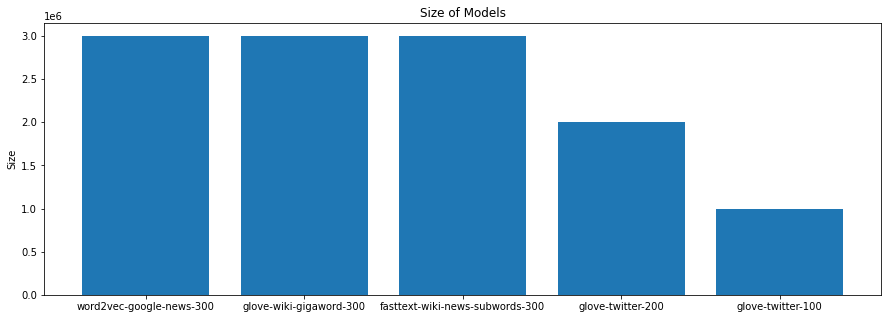

In [499]:
keys = size.keys()
values = size.values()
plt.figure(figsize=(15,5))
plt.bar(keys, values)
plt.title('Size of Models')
plt.ylabel('Size')
plt.savefig('model_size.pdf')
plt.show()

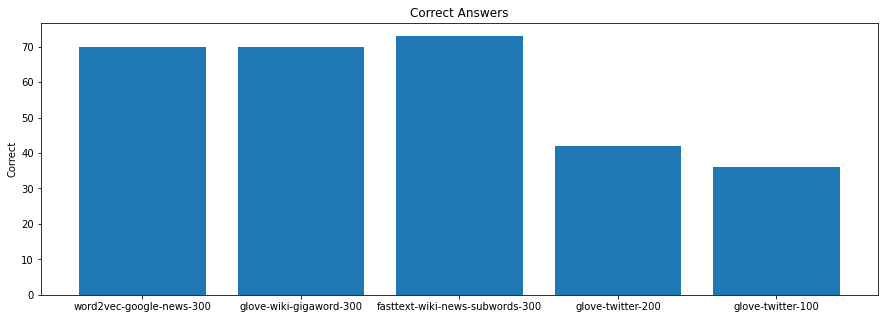

In [500]:
keys = correct.keys()
values = correct.values()
plt.figure(figsize=(15,5))
plt.bar(keys, values)
plt.title('Correct Answers')
plt.ylabel('Correct')
plt.savefig('correct_answers.pdf')
plt.show()

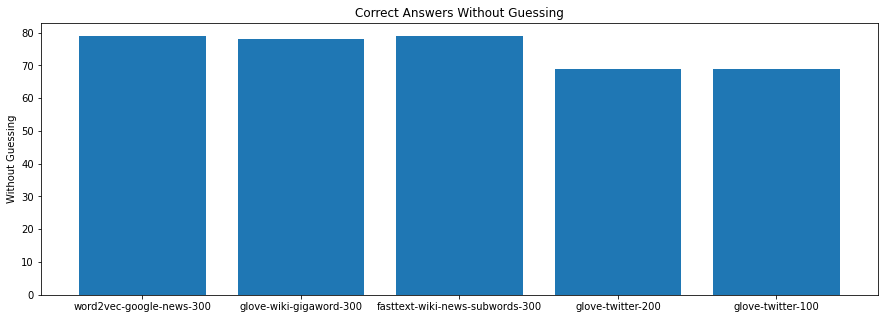

In [501]:
keys = no_guess.keys()
values = no_guess.values()
plt.figure(figsize=(15,5))
plt.bar(keys, values)
plt.title('Correct Answers Without Guessing')
plt.ylabel('Without Guessing')
plt.savefig('correct_answers_without_guessing.pdf')
plt.show()

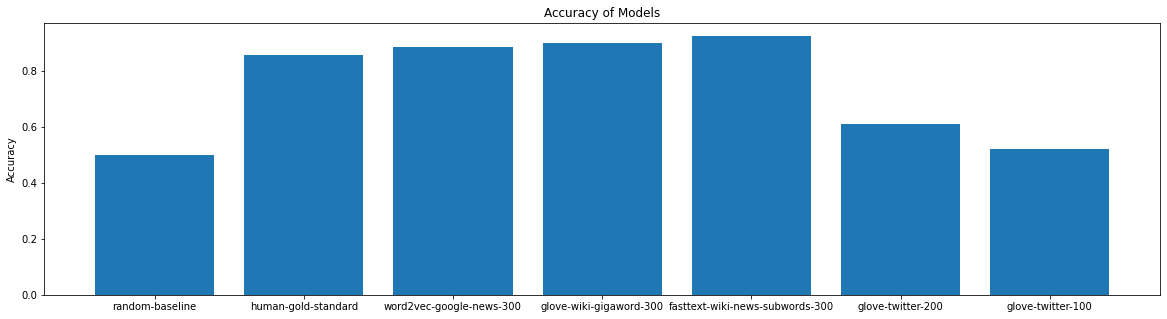

In [502]:
keys = accuracy.keys()
values = accuracy.values()
plt.figure(figsize=(20,5))
plt.bar(keys, values)
plt.title('Accuracy of Models')
plt.ylabel('Accuracy')
plt.savefig('accuracy.pdf')
plt.show()